In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)


2110848/2110848 [==============================] - 1s 1us/step


In [35]:
import numpy as np

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

550378/550378 [==============================] - 1s 2us/step


In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
#can you this method 
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

#or this 
#from keras.utils.np_utils import to_categorical
#one_hot_train_labels = to_categorical(train_labels)
#one_hot_test_labels = to_categorical(test_labels)

In [10]:
from keras import models
from keras import layers

In [15]:
#used 64 instead of 16 as the model has 46 out puts and 16 would not have been enough parameters to contain the large number of info
model=models.Sequential()
model.add(layers.Dense(64,activation="relu",input_shape=(10000,)))
model.add(layers.Dense(64,activation="relu"))
# the last layer will tell the probability of the text being any of the 46 options and the sum of all will be 1
model.add(layers.Dense(46,activation="softmax"))

In [16]:
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["acc"])

In [17]:
#set aside for validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [18]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20


16/16 [==============================] - 1s 30ms/step - loss: 2.7972 - acc: 0.4966 - val_loss: 1.9206 - val_acc: 0.6130
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.5989 - acc: 0.6635 - val_loss: 1.4226 - val_acc: 0.6930
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.2159 - acc: 0.7319 - val_loss: 1.2052 - val_acc: 0.7230
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.9867 - acc: 0.7816 - val_loss: 1.0951 - val_acc: 0.7610
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.8162 - acc: 0.8218 - val_loss: 1.0014 - val_acc: 0.7850
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6817 - acc: 0.8507 - val_loss: 0.9539 - val_acc: 0.7910
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5633 - acc: 0.8812 - val_loss: 0.9233 - val_acc: 0.7970
Epoch 8/20
16/16 [==============================] - 0s 20ms/step - loss: 0.4807 -

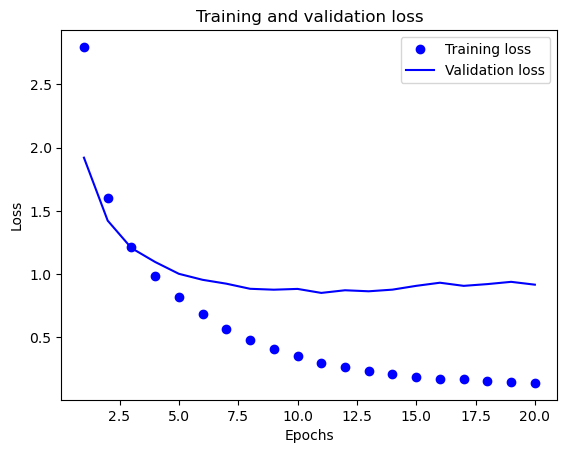

In [19]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

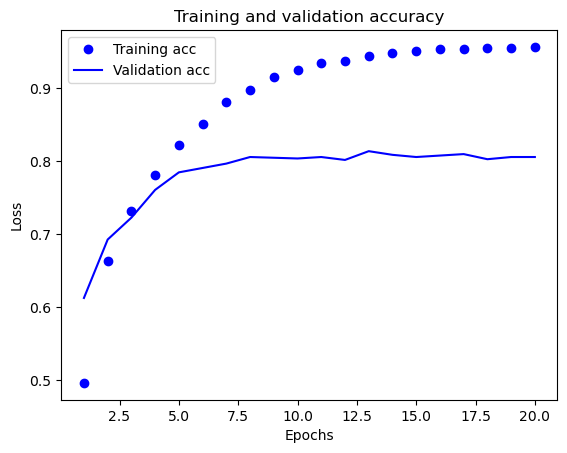

In [20]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 1.0466 - acc: 0.7925


In [29]:
#we see after the 9th epoch the training data continues ot fit while validation remains stagnent meaning the model over fits to the 
#data so lets try the accuracy with  9 epoch
# this model os the exact same as the previous models except it  has 9 epoch instead of  20
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 27ms/step - loss: 2.8966 - accuracy: 0.5085 - val_loss: 1.9747 - val_accuracy: 0.6020
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 1.6228 - accuracy: 0.6749 - val_loss: 1.4398 - val_accuracy: 0.6910
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 1.2288 - accuracy: 0.7365 - val_loss: 1.2418 - val_accuracy: 0.7260
Epoch 4/9
16/16 [==============================] - 0s 15ms/step - loss: 1.0191 - accuracy: 0.7815 - val_loss: 1.1350 - val_accuracy: 0.7450
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 0.8475 - accuracy: 0.8217 - val_loss: 1.0551 - val_accuracy: 0.7790
Epoch 6/9
16/16 [==============================] - 0s 15ms/step - loss: 0.7147 - accuracy: 0.8488 - val_loss: 0.9771 - val_accuracy: 0.7970
Epoch 7/9
16/16 [==============================] - 0s 15ms/step - loss: 0.5953 - accuracy: 0.8763 - val_loss: 0.9425 - val_accuracy: 0.7940
Epoch 8/9
16/16 [===

In [31]:
# gives prediction of all the test data
predictions = model.predict(x_test)

71/71 [==============================] - 0s 1ms/step


In [33]:
# shows the sum of all values of each probability results in the sum of 1
predictions[0].sum()

1.0000001

In [36]:
# tells that the highest probabilty of test sentence 0 is being of the class 3 out of 46 classes
np.argmax(predictions[0])

3

In [37]:
# a different way to handle data and its results

In [38]:
# turn labels into arrays
y_train = np.array(train_labels)
y_test = np.array(test_labels)

(8982,)

In [41]:
# in this model the center  layer has a 4 hidden units which causes the accuracy to drp in the final test evaliation models
# models accuracy reached .785 while this model resulted in .70 
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 2.5652 - accuracy: 0.3800 - val_loss: 1.8706 - val_accuracy: 0.5240
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 1.6078 - accuracy: 0.6349 - val_loss: 1.4778 - val_accuracy: 0.6580
Epoch 3/20
63/63 [==============================] - 0s 8ms/step - loss: 1.3034 - accuracy: 0.6961 - val_loss: 1.3469 - val_accuracy: 0.6910
Epoch 4/20
63/63 [==============================] - 0s 8ms/step - loss: 1.1496 - accuracy: 0.7230 - val_loss: 1.2916 - val_accuracy: 0.6990
Epoch 5/20
63/63 [==============================] - 1s 10ms/step - loss: 1.0410 - accuracy: 0.7419 - val_loss: 1.2496 - val_accuracy: 0.7170
Epoch 6/20
63/63 [==============================] - 1s 8ms/step - loss: 0.9547 - accuracy: 0.7536 - val_loss: 1.2517 - val_accuracy: 0.7130
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 0.8869 - accuracy: 0.7615 - val_loss: 1.2472 - val_accuracy: 0.7110
Epoch 8/20
63/63 [

In [42]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 1ms/step - loss: 1.6407 - accuracy: 0.7053


In [43]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 1.8376 - accuracy: 0.6094 - val_loss: 1.3325 - val_accuracy: 0.6930
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0222 - accuracy: 0.7755 - val_loss: 1.0218 - val_accuracy: 0.7860
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 0.7134 - accuracy: 0.8424 - val_loss: 1.0088 - val_accuracy: 0.7780
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 0.5093 - accuracy: 0.8860 - val_loss: 0.9811 - val_accuracy: 0.7740
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 0.3731 - accuracy: 0.9143 - val_loss: 0.9177 - val_accuracy: 0.8070
Epoch 6/20
63/63 [==============================] - 1s 10ms/step - loss: 0.2885 - accuracy: 0.9337 - val_loss: 0.9817 - val_accuracy: 0.8040
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 0.2368 - accuracy: 0.9414 - val_loss: 1.1433 - val_accuracy: 0.7700
Epoch 8/20
63/63 [

In [44]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
63/63 [==============================] - 2s 22ms/step - loss: 1.6572 - accuracy: 0.6317 - val_loss: 1.1987 - val_accuracy: 0.7120
Epoch 2/20
63/63 [==============================] - 1s 17ms/step - loss: 0.8806 - accuracy: 0.8017 - val_loss: 0.9361 - val_accuracy: 0.8000
Epoch 3/20
63/63 [==============================] - 1s 18ms/step - loss: 0.5459 - accuracy: 0.8781 - val_loss: 0.9364 - val_accuracy: 0.7850
Epoch 4/20
63/63 [==============================] - 1s 18ms/step - loss: 0.3539 - accuracy: 0.9211 - val_loss: 1.0843 - val_accuracy: 0.7710
Epoch 5/20
63/63 [==============================] - 1s 18ms/step - loss: 0.2543 - accuracy: 0.9424 - val_loss: 1.0111 - val_accuracy: 0.7960
Epoch 6/20
63/63 [==============================] - 1s 18ms/step - loss: 0.2029 - accuracy: 0.9494 - val_loss: 0.9589 - val_accuracy: 0.7950
Epoch 7/20
63/63 [==============================] - 1s 19ms/step - loss: 0.1770 - accuracy: 0.9526 - val_loss: 1.0502 - val_accuracy: 0.7940
Epoch 8/20
63

In [45]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 2.3221 - accuracy: 0.5400 - val_loss: 1.5214 - val_accuracy: 0.6480
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 1.3182 - accuracy: 0.7008 - val_loss: 1.2291 - val_accuracy: 0.7120
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0161 - accuracy: 0.7582 - val_loss: 1.0995 - val_accuracy: 0.7500
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 0.8046 - accuracy: 0.8128 - val_loss: 1.0162 - val_accuracy: 0.7670
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 0.6354 - accuracy: 0.8495 - val_loss: 0.9834 - val_accuracy: 0.7730
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.5055 - accuracy: 0.8820 - val_loss: 0.9638 - val_accuracy: 0.7950
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.4042 - accuracy: 0.9089 - val_loss: 1.0508 - val_accuracy: 0.7850
Epoch 8/20
63/63 [=

In [46]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
63/63 [==============================] - 2s 22ms/step - loss: 1.8147 - accuracy: 0.5992 - val_loss: 1.2559 - val_accuracy: 0.7090
Epoch 2/20
63/63 [==============================] - 1s 17ms/step - loss: 1.0085 - accuracy: 0.7650 - val_loss: 1.0379 - val_accuracy: 0.7790
Epoch 3/20
63/63 [==============================] - 1s 17ms/step - loss: 0.6721 - accuracy: 0.8448 - val_loss: 0.9807 - val_accuracy: 0.7650
Epoch 4/20
63/63 [==============================] - 1s 17ms/step - loss: 0.4557 - accuracy: 0.8963 - val_loss: 1.0045 - val_accuracy: 0.7840
Epoch 5/20
63/63 [==============================] - 1s 17ms/step - loss: 0.3295 - accuracy: 0.9273 - val_loss: 1.0232 - val_accuracy: 0.7980
Epoch 6/20
63/63 [==============================] - 1s 16ms/step - loss: 0.2553 - accuracy: 0.9430 - val_loss: 0.9128 - val_accuracy: 0.8090
Epoch 7/20
63/63 [==============================] - 1s 16ms/step - loss: 0.2178 - accuracy: 0.9483 - val_loss: 0.9543 - val_accuracy: 0.8140
Epoch 8/20
63

In [47]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
63/63 [==============================] - 2s 18ms/step - loss: 1.6221 - accuracy: 0.6505 - val_loss: 1.1624 - val_accuracy: 0.7220
Epoch 2/20
63/63 [==============================] - 1s 13ms/step - loss: 0.8213 - accuracy: 0.8157 - val_loss: 0.9584 - val_accuracy: 0.7990
Epoch 3/20
63/63 [==============================] - 1s 14ms/step - loss: 0.5153 - accuracy: 0.8911 - val_loss: 0.8348 - val_accuracy: 0.8160
Epoch 4/20
63/63 [==============================] - 1s 14ms/step - loss: 0.3457 - accuracy: 0.9235 - val_loss: 0.8336 - val_accuracy: 0.8270
Epoch 5/20
63/63 [==============================] - 1s 15ms/step - loss: 0.2551 - accuracy: 0.9406 - val_loss: 0.8677 - val_accuracy: 0.8160
Epoch 6/20
63/63 [==============================] - 1s 15ms/step - loss: 0.2108 - accuracy: 0.9483 - val_loss: 0.8618 - val_accuracy: 0.8230
Epoch 7/20
63/63 [==============================] - 1s 16ms/step - loss: 0.1819 - accuracy: 0.9530 - val_loss: 0.8837 - val_accuracy: 0.8210
Epoch 8/20
63

In [48]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 2.0819 - accuracy: 0.5778 - val_loss: 1.3611 - val_accuracy: 0.6900
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 1.1375 - accuracy: 0.7467 - val_loss: 1.0914 - val_accuracy: 0.7530
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 0.8374 - accuracy: 0.8145 - val_loss: 1.0024 - val_accuracy: 0.7760
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 0.6330 - accuracy: 0.8561 - val_loss: 0.9121 - val_accuracy: 0.8120
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 0.4803 - accuracy: 0.8934 - val_loss: 0.9083 - val_accuracy: 0.8030
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.3665 - accuracy: 0.9182 - val_loss: 0.9023 - val_accuracy: 0.8140
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.2903 - accuracy: 0.9342 - val_loss: 0.9194 - val_accuracy: 0.8100
Epoch 8/20
63/63 [=

In [49]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
63/63 [==============================] - 2s 17ms/step - loss: 1.8732 - accuracy: 0.6115 - val_loss: 1.2581 - val_accuracy: 0.7370
Epoch 2/20
63/63 [==============================] - 1s 13ms/step - loss: 0.9509 - accuracy: 0.7923 - val_loss: 1.0389 - val_accuracy: 0.7830
Epoch 3/20
63/63 [==============================] - 1s 14ms/step - loss: 0.6458 - accuracy: 0.8576 - val_loss: 0.9366 - val_accuracy: 0.8010
Epoch 4/20
63/63 [==============================] - 1s 14ms/step - loss: 0.4545 - accuracy: 0.9042 - val_loss: 0.9199 - val_accuracy: 0.8060
Epoch 5/20
63/63 [==============================] - 1s 14ms/step - loss: 0.3351 - accuracy: 0.9268 - val_loss: 0.8991 - val_accuracy: 0.8200
Epoch 6/20
63/63 [==============================] - 1s 14ms/step - loss: 0.2640 - accuracy: 0.9407 - val_loss: 0.9171 - val_accuracy: 0.8180
Epoch 7/20
63/63 [==============================] - 1s 15ms/step - loss: 0.2181 - accuracy: 0.9466 - val_loss: 0.9943 - val_accuracy: 0.7990
Epoch 8/20
63

In [ ]:
#TODO compare all results and their accuracy for judgment